# Assignment8
## CS-5891-01 Special Topics Deep Learning
## Ronald Picard

In this notebook we will walk through the design, training, and testing of convolutional neural networks (CNNs). These neural networks will be used for image classification. Classification will be performed on images of handwritten single numerical digits (0-9). 

The data set we will be using is the MNIST data set. This is a very popular data set amoung the machine learning community. The data set contains 60,000 images, and each image contains a handwritten numerical digit. Each of the images have been provided with a truth label that corresponds to the handwritten digit within the image from the set {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.

In order to do this we will be utilize Keras, which is a high-level API for Tensorflow, which is Google's machine learning library.

Convolutional neural networks differ from traditional feed-forward networks in that they replace the matrix multiplication operator with a convolution operator. This provides sparse connections and a large reduction in the number of paramters that need to be trained. In CNNs, the weights that need to be trained are kernel elements.

We wish to explore the impact of adjustments in the CNN architecture, optimization algorithms, regularization
techniques, and hyperparameters. Therefore, we will start with a base network and adjust from there. 

We will start with the following base network:

1. CNN architecture: 
    a. Convolution layer (kernel 3X3) then MaxPooling (3X3), Relu
    b. Convolution layer (kernel 2X2) then MaxPooling (2X2), Relu, Dropout (Keep Probability 0.25)
    c. Dense layer (units 128), Relu, Dropout (Keep Probability 0.5)
    d. Output layer (units 128), Softmax
2. Dropout: 
    a. As specified in 1
3. Optimization algorithm: 
    a. AdaDelta, which is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates.
4. Minibatches: 
    a. 256
5. Epochs:
    a. 20

(10000, 28, 28, 1)
(5000, 10)
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
 - 2s - loss: 0.9949 - acc: 0.6815 - val_loss: 0.4530 - val_acc: 0.8600
Epoch 2/20
 - 1s - loss: 0.3271 - acc: 0.9011 - val_loss: 0.2929 - val_acc: 0.8978
Epoch 3/20
 - 1s - loss: 0.2172 - acc: 0.9331 - val_loss: 0.1478 - val_acc: 0.9540
Epoch 4/20
 - 1s - loss: 0.1755 - acc: 0.9486 - val_loss: 0.1114 - val_acc: 0.9662
Epoch 5/20
 - 1s - loss: 0.1371 - acc: 0.9579 - val_loss: 0.1619 - val_acc: 0.9518
Epoch 6/20
 - 1s - loss: 0.1235 - acc: 0.9617 - val_loss: 0.0977 - val_acc: 0.9654
Epoch 7/20
 - 1s - loss: 0.1080 - acc: 0.9685 - val_loss: 0.0807 - val_acc: 0.9752
Epoch 8/20
 - 1s - loss: 0.0914 - acc: 0.9726 - val_loss: 0.0703 - val_acc: 0.9780
Epoch 9/20
 - 1s - loss: 0.0887 - acc: 0.9731 - val_loss: 0.0822 - val_acc: 0.9748
Epoch 10/20
 - 1s - loss: 0.0717 - acc: 0.9771 - val_loss: 0.0659 - val_acc: 0.9796
Epoch 11/20
 - 2s - loss: 0.0635 - acc: 0.9811 - val_loss: 0.0811 - val_acc: 0.9772
Epoch 

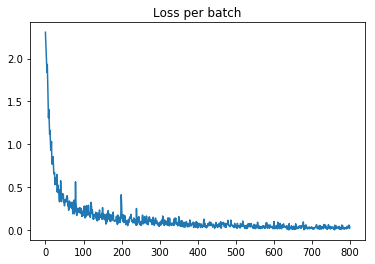

In [2]:
#import sys
#print(sys.path)
#print(sys.executable)

import cnn_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def init_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
    
filePath = 'C:/Users/computer/Desktop/Assignment8/'   # the training set is stored in this directory
mnistData= cnn_utils.loadData(filePath)
mnistData_preprocessed = cnn_utils.preprocessData_CNN(mnistData)
(X_train, y_train), (X_test, y_test) = mnistData_preprocessed

(X_train_mini_batch, y_train_mini_batch) = cnn_utils.mini_batch(X_train, y_train, 10000, 0)
(X_test_mini_batch, y_test_mini_batch) = cnn_utils.mini_batch(X_test, y_test, 5000, 0)
print(X_train_mini_batch.shape)
print(y_test_mini_batch.shape)

model = init_model()
history = LossHistory()
model.fit(X_train_mini_batch, y_train_mini_batch, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(X_test_mini_batch, y_test_mini_batch), verbose=2)

score = model.evaluate(X_test_mini_batch, y_test_mini_batch, batch_size=16)
print(score)
plot_losses(history.losses)

As illustrated after 20 epochs we reached a cost of approximately 0.05887 and a test accuracy of 0.9808. The results are very good and reflect upon the power of CNNs.

We will now investigate the impact of the CNN architecture by adding a duplicated third convolution layer (kernel 2X2) after the second convolution layer with the same dropout rate and followed by max pooling; essentially deepending the network one extra layer.

We will use the following:

1. CNN architecture: 
    a. Convolution layer (kernel 3X3) then MaxPooling (3X3), Relu
    b. Convolution layer (kernel 2X2) then MaxPooling (2X2), Relu, Dropout (Keep Probability 0.25)
    c. Convolution layer (kernel 2X2) then MaxPooling (2X2), Relu, Dropout (Keep Probability 0.25)
    d. Dense layer (units 128), Relu, Dropout (Keep Probability 0.5)
    e. Output layer (units 128), Softmax
2. Dropout: 
    a. As specified in 1
3. Optimization algorithm: 
    a. AdaDelta, which is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates.
4. Minibatches: 
    a. 256
5. Epochs:
    a. 20

(10000, 28, 28, 1)
(5000, 10)
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
 - 2s - loss: 1.3108 - acc: 0.5607 - val_loss: 0.8883 - val_acc: 0.6878
Epoch 2/20
 - 1s - loss: 0.4110 - acc: 0.8771 - val_loss: 0.2178 - val_acc: 0.9314
Epoch 3/20
 - 1s - loss: 0.2746 - acc: 0.9209 - val_loss: 0.1359 - val_acc: 0.9602
Epoch 4/20
 - 1s - loss: 0.2049 - acc: 0.9388 - val_loss: 0.0881 - val_acc: 0.9744
Epoch 5/20
 - 1s - loss: 0.1769 - acc: 0.9438 - val_loss: 0.1166 - val_acc: 0.9644
Epoch 6/20
 - 1s - loss: 0.1577 - acc: 0.9526 - val_loss: 0.1537 - val_acc: 0.9508
Epoch 7/20
 - 1s - loss: 0.1467 - acc: 0.9546 - val_loss: 0.0779 - val_acc: 0.9754
Epoch 8/20
 - 1s - loss: 0.1251 - acc: 0.9622 - val_loss: 0.0578 - val_acc: 0.9826
Epoch 9/20
 - 1s - loss: 0.1077 - acc: 0.9686 - val_loss: 0.0608 - val_acc: 0.9826
Epoch 10/20
 - 1s - loss: 0.1045 - acc: 0.9671 - val_loss: 0.0515 - val_acc: 0.9842
Epoch 11/20
 - 1s - loss: 0.0909 - acc: 0.9705 - val_loss: 0.0474 - val_acc: 0.9850
Epoch 

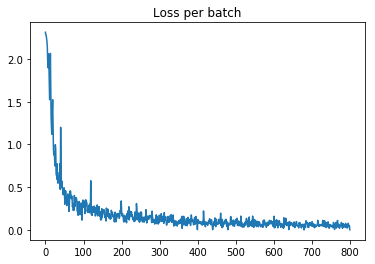

In [2]:
#import sys
#print(sys.path)
#print(sys.executable)

import cnn_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def init_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
    
filePath = 'C:/Users/computer/Desktop/Assignment8/'   # the training set is stored in this directory
mnistData= cnn_utils.loadData(filePath)
mnistData_preprocessed = cnn_utils.preprocessData_CNN(mnistData)
(X_train, y_train), (X_test, y_test) = mnistData_preprocessed

(X_train_mini_batch, y_train_mini_batch) = cnn_utils.mini_batch(X_train, y_train, 10000, 0)
(X_test_mini_batch, y_test_mini_batch) = cnn_utils.mini_batch(X_test, y_test, 5000, 0)
print(X_train_mini_batch.shape)
print(y_test_mini_batch.shape)

model = init_model()
history = LossHistory()
model.fit(X_train_mini_batch, y_train_mini_batch, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(X_test_mini_batch, y_test_mini_batch), verbose=2)

score = model.evaluate(X_test_mini_batch, y_test_mini_batch, batch_size=16)
print(score)
plot_losses(history.losses)

As illustrated after 20 epochs we reached a cost of approximately 0.0449 and a test accuracy of 0.9864. The results are very good and reflect upon the power of CNNs. These results are slightly higher than the nextwork with less layers. This may line up with the intuition that if we have enough data, we can learn additional features by deepending the network which increases our accuracy. 

We will now investigate the impact of the optimaization algorithm used by swithing from AdaDelta to ADAM. We will also use the first version of the network for comparison.

We will use the following:

1. CNN architecture: 
    a. Convolution layer (kernel 3X3) then MaxPooling (3X3), Relu
    b. Convolution layer (kernel 2X2) then MaxPooling (2X2), Relu, Dropout (Keep Probability 0.25)
    c. Dense layer (units 128), Relu, Dropout (Keep Probability 0.5)
    d. Output layer (units 128), Softmax
2. Dropout: 
    a. As specified in 1
3. Optimization algorithm: 
    a. Adam
4. Minibatches: 
    a. 256
5. Epochs:
    a. 20

(10000, 28, 28, 1)
(5000, 10)
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
 - 2s - loss: 0.8476 - acc: 0.7388 - val_loss: 0.2533 - val_acc: 0.9256
Epoch 2/20
 - 1s - loss: 0.3085 - acc: 0.9096 - val_loss: 0.1384 - val_acc: 0.9568
Epoch 3/20
 - 1s - loss: 0.2061 - acc: 0.9390 - val_loss: 0.1049 - val_acc: 0.9664
Epoch 4/20
 - 1s - loss: 0.1512 - acc: 0.9535 - val_loss: 0.0878 - val_acc: 0.9724
Epoch 5/20
 - 1s - loss: 0.1176 - acc: 0.9648 - val_loss: 0.0970 - val_acc: 0.9714
Epoch 6/20
 - 1s - loss: 0.1141 - acc: 0.9647 - val_loss: 0.0684 - val_acc: 0.9776
Epoch 7/20
 - 1s - loss: 0.0904 - acc: 0.9714 - val_loss: 0.0632 - val_acc: 0.9794
Epoch 8/20
 - 1s - loss: 0.0712 - acc: 0.9796 - val_loss: 0.0618 - val_acc: 0.9800
Epoch 9/20
 - 1s - loss: 0.0668 - acc: 0.9802 - val_loss: 0.0575 - val_acc: 0.9826
Epoch 10/20
 - 1s - loss: 0.0593 - acc: 0.9806 - val_loss: 0.0588 - val_acc: 0.9820
Epoch 11/20
 - 1s - loss: 0.0487 - acc: 0.9849 - val_loss: 0.0520 - val_acc: 0.9828
Epoch 

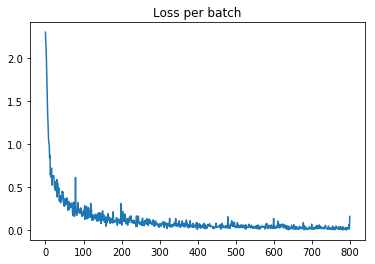

In [6]:
#import sys
#print(sys.path)
#print(sys.executable)

import cnn_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def init_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
    
filePath = 'C:/Users/computer/Desktop/Assignment8/'   # the training set is stored in this directory
mnistData= cnn_utils.loadData(filePath)
mnistData_preprocessed = cnn_utils.preprocessData_CNN(mnistData)
(X_train, y_train), (X_test, y_test) = mnistData_preprocessed

(X_train_mini_batch, y_train_mini_batch) = cnn_utils.mini_batch(X_train, y_train, 10000, 0)
(X_test_mini_batch, y_test_mini_batch) = cnn_utils.mini_batch(X_test, y_test, 5000, 0)
print(X_train_mini_batch.shape)
print(y_test_mini_batch.shape)

model = init_model()
history = LossHistory()
model.fit(X_train_mini_batch, y_train_mini_batch, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(X_test_mini_batch, y_test_mini_batch), verbose=2)

score = model.evaluate(X_test_mini_batch, y_test_mini_batch, batch_size=16)
print(score)
plot_losses(history.losses)

As illustrated after 20 epochs we reached a cost of approximately 0.05288 and a test accuracy of 0.9844. The results are very good and reflect upon the power of CNNs. These results are slightly higher than the first network that utilized AdaDelta. This may line up with the intuition that, since Adam utilizes the exponentially weighted moving average of the gradient and the square of the gradient, rather than just the square the gradient alone to adjust the learning rate in each dimension, the velocity of the gradient helps to push the network to the minima faster, thus, reaching a lower cost and higher accuracy in the same number of epochs. 

Now we with to investigate the impact of the regularization techniques used on the network. We will add L2 Normalization with a hyper-parameter of 0.85 to the first dense layer. We will reset the optimization algorithm to AdaDelta for comparison with the first network.

We will use the following:

1. CNN architecture: 
    a. Convolution layer (kernel 3X3) then MaxPooling (3X3), Relu
    b. Convolution layer (kernel 2X2) then MaxPooling (2X2), Relu, Dropout (Keep Probability 0.25)
    c. Dense layer (units 128), Relu, Dropout (Keep Probability 0.5) & L2 Regularization (Hyper-Paramters 0.85)
    d. Output layer (units 128), Softmax
2. Dropout: 
    a. As specified in 1
3. Optimization algorithm: 
    a. AdaDelta, which is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates.
4. Minibatches: 
    a. 256
5. Epochs:
    a. 20

(10000, 28, 28, 1)
(5000, 10)
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
 - 2s - loss: 36.4693 - acc: 0.3377 - val_loss: 2.6179 - val_acc: 0.2822
Epoch 2/20
 - 1s - loss: 2.1179 - acc: 0.5021 - val_loss: 2.5394 - val_acc: 0.4400
Epoch 3/20
 - 1s - loss: 1.8228 - acc: 0.6050 - val_loss: 1.8938 - val_acc: 0.6556
Epoch 4/20
 - 1s - loss: 1.5863 - acc: 0.6803 - val_loss: 1.5547 - val_acc: 0.6830
Epoch 5/20
 - 1s - loss: 1.4296 - acc: 0.7192 - val_loss: 1.7215 - val_acc: 0.6682
Epoch 6/20
 - 1s - loss: 1.3064 - acc: 0.7400 - val_loss: 1.2562 - val_acc: 0.7658
Epoch 7/20
 - 1s - loss: 1.1981 - acc: 0.7648 - val_loss: 1.0298 - val_acc: 0.8656
Epoch 8/20
 - 1s - loss: 1.1338 - acc: 0.7872 - val_loss: 1.4741 - val_acc: 0.6896
Epoch 9/20
 - 1s - loss: 1.0622 - acc: 0.8015 - val_loss: 1.2671 - val_acc: 0.7646
Epoch 10/20
 - 1s - loss: 0.9862 - acc: 0.8169 - val_loss: 0.9725 - val_acc: 0.8292
Epoch 11/20
 - 1s - loss: 0.9470 - acc: 0.8194 - val_loss: 1.0506 - val_acc: 0.7860
Epoch

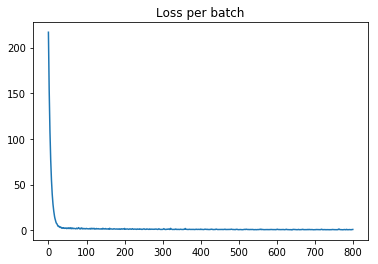

In [13]:
#import sys
#print(sys.path)
#print(sys.executable)

import cnn_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb
from keras import regularizers

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def init_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.85), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
    
filePath = 'C:/Users/computer/Desktop/Assignment8/'   # the training set is stored in this directory
mnistData= cnn_utils.loadData(filePath)
mnistData_preprocessed = cnn_utils.preprocessData_CNN(mnistData)
(X_train, y_train), (X_test, y_test) = mnistData_preprocessed

(X_train_mini_batch, y_train_mini_batch) = cnn_utils.mini_batch(X_train, y_train, 10000, 0)
(X_test_mini_batch, y_test_mini_batch) = cnn_utils.mini_batch(X_test, y_test, 5000, 0)
print(X_train_mini_batch.shape)
print(y_test_mini_batch.shape)

model = init_model()
history = LossHistory()
model.fit(X_train_mini_batch, y_train_mini_batch, epochs=20, batch_size=256,
                callbacks=[history],
                validation_data=(X_test_mini_batch, y_test_mini_batch), verbose=2)

score = model.evaluate(X_test_mini_batch, y_test_mini_batch, batch_size=16)
print(score)
plot_losses(history.losses)

As illustrated after 20 epochs we reached a cost of approximately 0.05557 and a test accuracy of 0.9312. The cost and test accuracy levelized to an unacceptable level here. Intuitively, L2 regularization attempts to decrease the weights towards zero; therefore, the weights naturally find a balance between fitting the training data and pushing towards zero. Since we had a high L2 hyper-parameter of 0.85, the weights of the first dense layer had high tendedancy to decrease and likely cause the model to underfit the training data (essentially smoothing out the curve too much). 

The last thing we wish to do is investigate the impact of the hyper-paramters of the network. One of the most fundamental hyper-parameters we have is the minibatch size; so we will focus on adjusting that one and see the effect on the results. We will decrease the minibach size down to 64 and see what results we achieve.

We will use the following:

1. CNN architecture: 
    a. Convolution layer (kernel 3X3), then MaxPooling (3X3) Relu
    b. Convolution layer (kernel 2X2), then MaxPooling (2X2) Relu, Dropout (Keep Probability 0.25)
    c. Dense layer (units 128), Relu, Dropout (Keep Probability 0.5)
    d. Output layer (units 128), Softmax
2. Dropout: 
    a. As specified in 1
3. Optimization algorithm: 
    a. Adam, which is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates.
4. Minibatches: 
    a. 64
5. Epochs:
    a. 20

(10000, 28, 28, 1)
(5000, 10)
Train on 10000 samples, validate on 5000 samples
Epoch 1/20
 - 3s - loss: 0.5596 - acc: 0.8251 - val_loss: 0.1715 - val_acc: 0.9458
Epoch 2/20
 - 2s - loss: 0.1822 - acc: 0.9453 - val_loss: 0.1044 - val_acc: 0.9662
Epoch 3/20
 - 2s - loss: 0.1270 - acc: 0.9604 - val_loss: 0.0846 - val_acc: 0.9724
Epoch 4/20
 - 2s - loss: 0.1077 - acc: 0.9675 - val_loss: 0.0763 - val_acc: 0.9760
Epoch 5/20
 - 2s - loss: 0.0832 - acc: 0.9757 - val_loss: 0.0895 - val_acc: 0.9724
Epoch 6/20
 - 2s - loss: 0.0746 - acc: 0.9780 - val_loss: 0.0636 - val_acc: 0.9788
Epoch 7/20
 - 2s - loss: 0.0595 - acc: 0.9820 - val_loss: 0.0528 - val_acc: 0.9820
Epoch 8/20
 - 2s - loss: 0.0520 - acc: 0.9850 - val_loss: 0.0546 - val_acc: 0.9828
Epoch 9/20
 - 3s - loss: 0.0462 - acc: 0.9852 - val_loss: 0.0534 - val_acc: 0.9840
Epoch 10/20
 - 2s - loss: 0.0436 - acc: 0.9865 - val_loss: 0.0598 - val_acc: 0.9816
Epoch 11/20
 - 2s - loss: 0.0369 - acc: 0.9880 - val_loss: 0.0517 - val_acc: 0.9830
Epoch 

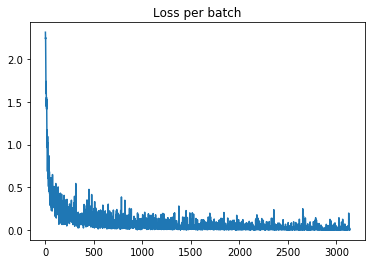

In [14]:
#import sys
#print(sys.path)
#print(sys.executable)

import cnn_utils
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.callbacks as cb
from keras import regularizers

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

def init_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
    
filePath = 'C:/Users/computer/Desktop/Assignment8/'   # the training set is stored in this directory
mnistData= cnn_utils.loadData(filePath)
mnistData_preprocessed = cnn_utils.preprocessData_CNN(mnistData)
(X_train, y_train), (X_test, y_test) = mnistData_preprocessed

(X_train_mini_batch, y_train_mini_batch) = cnn_utils.mini_batch(X_train, y_train, 10000, 0)
(X_test_mini_batch, y_test_mini_batch) = cnn_utils.mini_batch(X_test, y_test, 5000, 0)
print(X_train_mini_batch.shape)
print(y_test_mini_batch.shape)

model = init_model()
history = LossHistory()
model.fit(X_train_mini_batch, y_train_mini_batch, epochs=20, batch_size=64,
                callbacks=[history],
                validation_data=(X_test_mini_batch, y_test_mini_batch), verbose=2)

score = model.evaluate(X_test_mini_batch, y_test_mini_batch, batch_size=16)
print(score)
plot_losses(history.losses)

As illustrated, after 20 epochs we reached a cost of approximately 0.0519 and a test accuracy of 0.9844. The results are very good and reflect upon the power of CNNs. These results are comparable to the first network with minibataches of 256; however, the learning curve reveals a much more sporatic path towards the minima. Intiutively, this is because with a smaller minibatch size comes less precise gradients; therefore, the gradients vary more during each iteration and the cost changes rapidly. Though this can have the benefit of preventing the network from getting stuck on local minima, there is a trade-off in terms of the smoothness of the learning curve.